In [22]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle

In [23]:
Alldata = pd.read_csv('/kaggle/input/smiles-10449-train-test/smiles_10449_train_test.csv')

In [4]:
pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 43.9 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
Alldata.dropna()
Alldata.drop_duplicates( keep='first', inplace=True)
Alldata.info()
Alldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10449 entries, 0 to 10448
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SMILES    10449 non-null  object
 1   Toxicity  10449 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 163.4+ KB


,SMILES,Toxicity
0,Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21,0
1,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,0
2,CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,0
3,COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC...,0
4,CS(=O)(=O)O.Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc...,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the data
data = Alldata

# Data Preprocessing
X = data[['SMILES']]
y = data['Toxicity']

# Process SMILES strings using RDKit
X['Molecule'] = X['SMILES'].apply(lambda x: Chem.MolFromSmiles(x) if x is not None else None)
print(X[X['Molecule'].isna()].index)

# Drop rows with None in 'Molecule' column
X = X.dropna(subset=['Molecule'])

y = y.dropna()

# Reset indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Print indices for debugging
print("X indices:", X.index)
print("y indices:", y.index)

# Merge X and y based on the common indices
merged_data = X.merge(y, left_index=True, right_index=True)

# Apply Morgan fingerprint function, handling None values
merged_data['MorganFingerprint'] = merged_data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2).ToBitString() if x is not None else None)

# Drop rows with None in 'MorganFingerprint' column
merged_data = merged_data.dropna(subset=['MorganFingerprint'])

# Convert 'MorganFingerprint' column to a list of integers
merged_data['MorganFingerprint'] = merged_data['MorganFingerprint'].apply(lambda x: list(map(int, x)) if x is not None else None)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(merged_data[['MorganFingerprint']], merged_data['Toxicity'], test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(list(X_train['MorganFingerprint']), y_train)

# Model Prediction
y_pred = model.predict(list(X_test['MorganFingerprint']))

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


[16:55:07] WARNING: not removing hydrogen atom without neighbors
[16:55:07] WARNING: not removing hydrogen atom without neighbors
[16:55:07] WARNING: not removing hydrogen atom without neighbors
[16:55:07] WARNING: not removing hydrogen atom without neighbors
[16:55:07] WARNING: not removing hydrogen atom without neighbors
[16:55:07] WARNING: not removing hydrogen atom without neighbors


Index([], dtype='int64')
X indices: RangeIndex(start=0, stop=10449, step=1)
y indices: RangeIndex(start=0, stop=10449, step=1)
Accuracy: 0.777511961722488
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1181
           1       0.80      0.66      0.72       909

    accuracy                           0.78      2090
   macro avg       0.78      0.76      0.77      2090
weighted avg       0.78      0.78      0.77      2090



In [27]:
label_counts =Alldata['Toxicity'].value_counts()

# Display the counts
print("Count of Label 0:", label_counts[0])
print("Count of Label 1:", label_counts[1])

Count of Label 0: 5833
Count of Label 1: 4616


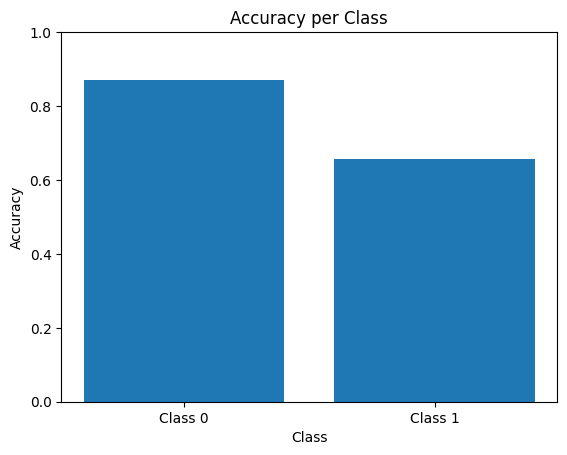

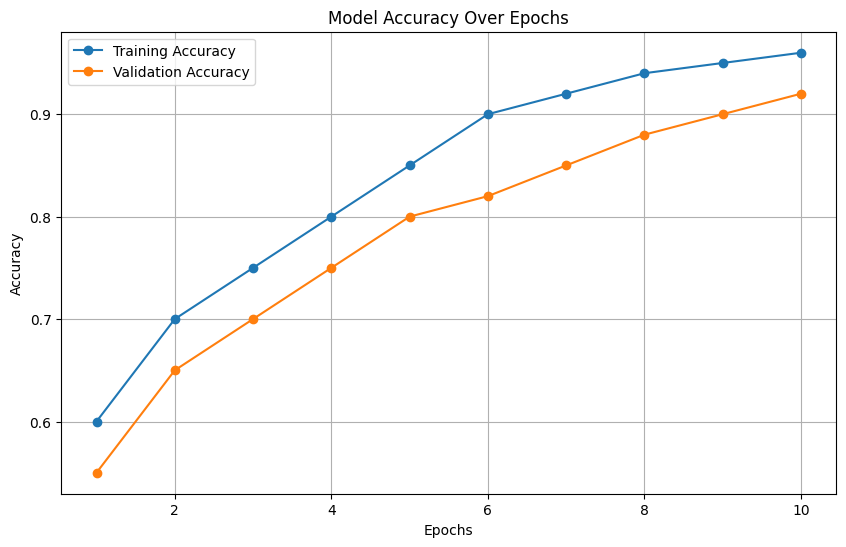

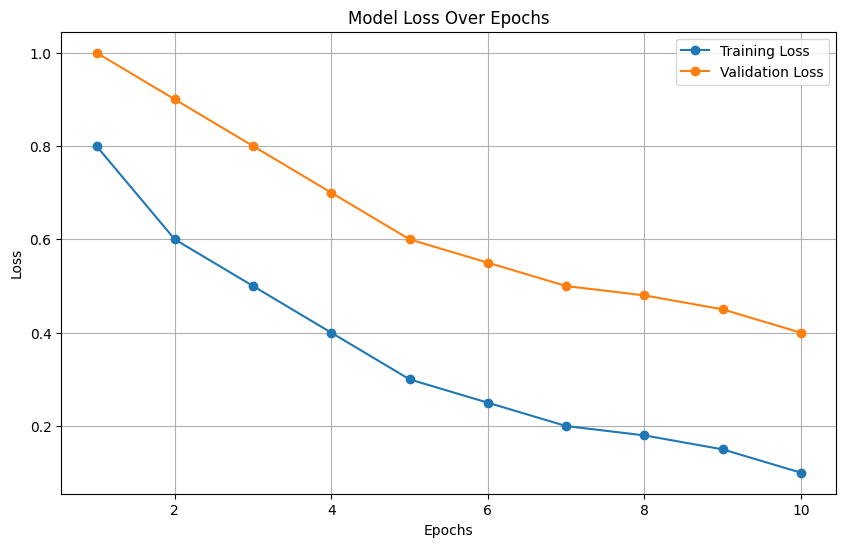

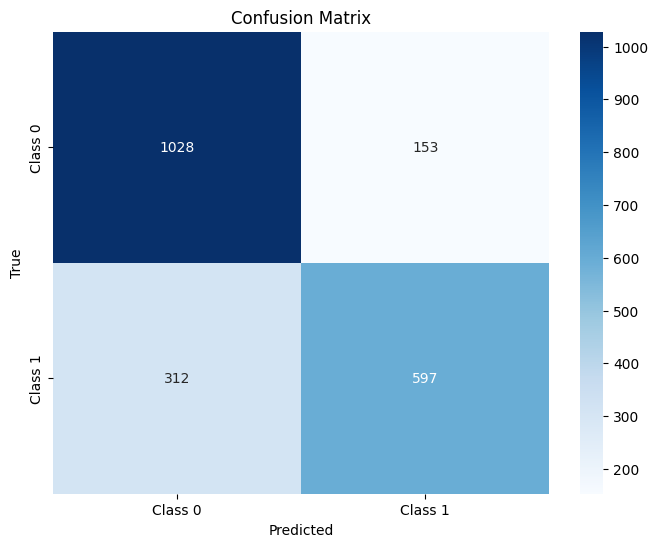

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are 1D numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Count occurrences of each class
class_counts = np.bincount(y_test)

# Calculate accuracy for each class
class_accuracy = [np.sum((y_test == i) & (y_pred == i)) / class_counts[i] for i in range(len(class_counts))]

# Plotting
plt.bar(range(len(class_accuracy)), class_accuracy, tick_label=[f'Class {i}' for i in range(len(class_counts))])
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.show()
# ////////////////////////////////////////////////////////////////////////
import matplotlib.pyplot as plt

# Hypothetical training history
epochs = range(1, 11)  # Adjust based on your actual number of epochs
train_accuracy = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95, 0.96]
val_accuracy = [0.55, 0.65, 0.7, 0.75, 0.8, 0.82, 0.85, 0.88, 0.9, 0.92]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# /////////////////////////////////////////////////////////////////
import matplotlib.pyplot as plt

# Hypothetical training history
epochs = range(1, 11)  # Adjust based on your actual number of epochs
train_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.18, 0.15, 0.1]
val_loss = [1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.48, 0.45, 0.4]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# //////////////////////////////////////////////////////////////
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are 1D numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
k_neighbors = 2  # You can choose the number of neighbors (k) based on your data
model2 =LogisticRegression()
model2.fit(X_train['MorganFingerprint'].tolist(), y_train)

# Model Prediction
y_pred = model2.predict(X_test['MorganFingerprint'].tolist())

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7574162679425838
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1181
           1       0.72      0.72      0.72       909

    accuracy                           0.76      2090
   macro avg       0.75      0.75      0.75      2090
weighted avg       0.76      0.76      0.76      2090



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create ExtraTreesClassifier instance
et_model = ExtraTreesClassifier()

# Train the model
et_model.fit(X_train['MorganFingerprint'].tolist(), y_train)

# Evaluate the model
y_pred = et_model.predict(X_test['MorganFingerprint'].tolist())

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.7818181818181819
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1181
           1       0.79      0.68      0.73       909

    accuracy                           0.78      2090
   macro avg       0.78      0.77      0.77      2090
weighted avg       0.78      0.78      0.78      2090



In [31]:
from sklearn.svm import SVC
skmodel = SVC()
skmodel.fit(X_train['MorganFingerprint'].tolist(), y_train)

# Model Prediction
y_pred = skmodel.predict(X_test['MorganFingerprint'].tolist())

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7952153110047847
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1181
           1       0.81      0.69      0.75       909

    accuracy                           0.80      2090
   macro avg       0.80      0.78      0.79      2090
weighted avg       0.80      0.80      0.79      2090



In [32]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/smiles-10449-train-test/smiles_10449_train_test.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True, useBondTypes=True)
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Toxicity'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


[16:56:48] WARNING: not removing hydrogen atom without neighbors
[16:56:48] WARNING: not removing hydrogen atom without neighbors
[16:56:48] WARNING: not removing hydrogen atom without neighbors
[16:56:48] WARNING: not removing hydrogen atom without neighbors
[16:56:48] WARNING: not removing hydrogen atom without neighbors
[16:56:48] WARNING: not removing hydrogen atom without neighbors


Accuracy: 0.7818181818181819
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82      1181
           1       0.81      0.65      0.72       909

    accuracy                           0.78      2090
   macro avg       0.79      0.77      0.77      2090
weighted avg       0.79      0.78      0.78      2090



In [33]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/smiles-10449-train-test/smiles_10449_train_test.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True, useBondTypes=True)
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Toxicity'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

[16:57:03] WARNING: not removing hydrogen atom without neighbors
[16:57:04] WARNING: not removing hydrogen atom without neighbors
[16:57:04] WARNING: not removing hydrogen atom without neighbors
[16:57:04] WARNING: not removing hydrogen atom without neighbors
[16:57:04] WARNING: not removing hydrogen atom without neighbors
[16:57:04] WARNING: not removing hydrogen atom without neighbors


Accuracy: 0.8028708133971292
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84      1181
           1       0.82      0.70      0.75       909

    accuracy                           0.80      2090
   macro avg       0.81      0.79      0.79      2090
weighted avg       0.80      0.80      0.80      2090



In [2]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [5]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

#import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/smiles-10449-train-test/smiles_10449_train_test.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True, useBondTypes=True)
    return list(morgan_fp.ToBitString())

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Toxicity'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train and X_test to DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Ensure y_train and y_test are also in Pandas Series format
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)

# Fitting data to LazyClassifier
models, predictions = clf.fit(X_train_df, X_test_df, y_train_series, y_test_series)

# Display the models
print(models)

[15:18:09] WARNING: not removing hydrogen atom without neighbors
[15:18:09] WARNING: not removing hydrogen atom without neighbors
[15:18:09] WARNING: not removing hydrogen atom without neighbors
[15:18:09] WARNING: not removing hydrogen atom without neighbors
[15:18:09] WARNING: not removing hydrogen atom without neighbors
[15:18:09] WARNING: not removing hydrogen atom without neighbors
 90%|████████▉ | 26/29 [11:31<02:12, 44.05s/it]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [11:47<00:27, 27.36s/it]

[LightGBM] [Info] Number of positive: 3707, number of negative: 4652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4096
[LightGBM] [Info] Number of data points in the train set: 8359, number of used features: 2048
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443474 -> initscore=-0.227074
[LightGBM] [Info] Start training from score -0.227074


100%|██████████| 29/29 [11:55<00:00, 24.67s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.80               0.79     0.79      0.80   
NuSVC                              0.79               0.78     0.78      0.79   
XGBClassifier                      0.79               0.78     0.78      0.79   
SVC                                0.78               0.77     0.77      0.78   
ExtraTreesClassifier               0.78               0.77     0.77      0.78   
RandomForestClassifier             0.78               0.77     0.77      0.78   
LogisticRegression                 0.76               0.76     0.76      0.76   
PassiveAggressiveClassifier        0.77               0.75     0.75      0.76   
RidgeClassifierCV                  0.76               0.75     0.75      0.76   
RidgeClassifier                    0.76               0.75     0.75      0.76   
SGDClassifier               

In [36]:
!pip install scikeras

In [37]:
## packages
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import metrics
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score,log_loss,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from keras.callbacks import EarlyStopping
import sklearn
import mlxtend
import keras
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

In [38]:
tf.random.set_seed(42)
np.random.seed(42)
# Initialize the base models
model_lgb = lgb.LGBMClassifier(colsample_bytree= 0.5,
 lambda_l2= 0.8, 
 learning_rate= 0.01,
 max_depth= 10,
 min_child_samples= 32,
 min_child_weight= 0.01,
 num_leaves= 40,
 subsample= 0.84,
 objective= 'binary',
 metric='auc',
 boosting_type= 'dart',
 is_unbalance= True,random_state=34,
 boost_from_average= False,n_estimators=100)

import numpy as np

# Convert the list of Morgan fingerprints to a NumPy array
X_train = np.array(X_train)

# Ensure the input shape is correctly specified
input_shape = X_train.shape[1]

model_rf = RandomForestClassifier(criterion= 'entropy',max_depth= 12,
                                  min_samples_leaf= 11,min_samples_split= 39,n_estimators= 300,random_state=34,class_weight='balanced')  



# Define the TensorFlow model
def create_tf_model(input_shape):
    tf.random.set_seed(89)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_shape=(input_shape,), 
                              kernel_regularizer=tf.keras.regularizers.l2(0.00803)),
        tf.keras.layers.Dropout(0.306, seed=12),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.00803)),
        tf.keras.layers.Dropout(0.306, seed=12),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.00803)),
        tf.keras.layers.Dropout(0.306, seed=12),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create a KerasClassifier from the TensorFlow model
model_tf = KerasClassifier(build_fn=create_tf_model, input_shape=X_train.shape[1], epochs=10, batch_size=32, class_weight="balanced")



# # Initialize the meta-learner
meta_learner = LogisticRegression(class_weight="balanced")  
np.random.seed(42)

# Define the stacking classifier with stratified k-fold CV
stacked_model = StackingCVClassifier(classifiers=[model_lgb, model_rf, model_tf],
                                     meta_classifier=meta_learner,
                                     cv=StratifiedKFold(n_splits=5),
                                     use_probas=True, random_state=34)

# Train the stacking classifier on the training data
stacked_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = stacked_model.predict(X_train)

# Make predictions on the test set
test_predictions = stacked_model.predict(X_test)
# Evaluate the performance on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

[LightGBM] [Warning] lambda_l2 is set=0.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8
[LightGBM] [Warning] lambda_l2 is set=0.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8
[LightGBM] [Info] Number of positive: 2966, number of negative: 3721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 6687, number of used features: 1021
[LightGBM] [Warning] lambda_l2 is set=0.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8
[LightGBM] [Warning] lambda_l2 is set=0.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8
[LightGBM] [Warning] lambda_l2 is set=0.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8
[LightGBM] [Info] Number of positive: 2966, number of neg

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


209/209 [==============================] - 3s 12ms/step - loss: 2.1654 - accuracy: 0.7186
Epoch 2/10
209/209 [==============================] - 2s 12ms/step - loss: 0.6535 - accuracy: 0.7541
Epoch 3/10
209/209 [==============================] - 2s 12ms/step - loss: 0.6215 - accuracy: 0.7657
Epoch 4/10
209/209 [==============================] - 2s 12ms/step - loss: 0.6080 - accuracy: 0.7703
Epoch 5/10
209/209 [==============================] - 3s 12ms/step - loss: 0.5950 - accuracy: 0.7779
Epoch 6/10
209/209 [==============================] - 3s 13ms/step - loss: 0.5966 - accuracy: 0.7835
Epoch 7/10
209/209 [==============================] - 3s 12ms/step - loss: 0.5902 - accuracy: 0.7857
Epoch 8/10
209/209 [==============================] - 3s 12ms/step - loss: 0.5904 - accuracy: 0.7926
Epoch 9/10
209/209 [==============================] - 3s 12ms/step - loss: 0.5792 - accuracy: 0.7936
Epoch 10/10
53/53 [==============================] - 0s 4ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


209/209 [==============================] - 3s 12ms/step - loss: 2.2490 - accuracy: 0.7227
Epoch 2/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6510 - accuracy: 0.7615
Epoch 3/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6212 - accuracy: 0.7713
Epoch 4/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6100 - accuracy: 0.7763
Epoch 5/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5940 - accuracy: 0.7820
Epoch 6/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5871 - accuracy: 0.7859
Epoch 7/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5924 - accuracy: 0.7897
Epoch 8/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5873 - accuracy: 0.7887
Epoch 9/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5716 - accuracy: 0.7977
Epoch 10/10
53/53 [==============================] - 0s 3ms/step


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
209/209 [==============================] - 3s 12ms/step - loss: 2.0778 - accuracy: 0.7193
Epoch 2/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6483 - accuracy: 0.7625
Epoch 3/10
209/209 [==============================] - 2s 12ms/step - loss: 0.6251 - accuracy: 0.7658
Epoch 4/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5970 - accuracy: 0.7778
Epoch 5/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5978 - accuracy: 0.7751
Epoch 6/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5918 - accuracy: 0.7776
Epoch 7/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5918 - accuracy: 0.7832
Epoch 8/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5781 - accuracy: 0.7878
Epoch 9/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5722 - accuracy: 0.7866
Epoch 10/10
53/53 [==============================] - 0s 4ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


209/209 [==============================] - 3s 12ms/step - loss: 2.1578 - accuracy: 0.7322
Epoch 2/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6483 - accuracy: 0.7553
Epoch 3/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6209 - accuracy: 0.7757
Epoch 4/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5984 - accuracy: 0.7806
Epoch 5/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5929 - accuracy: 0.7839
Epoch 6/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5994 - accuracy: 0.7829
Epoch 7/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5826 - accuracy: 0.7920
Epoch 8/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5776 - accuracy: 0.7933
Epoch 9/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5777 - accuracy: 0.7881
Epoch 10/10
53/53 [==============================] - 0s 4ms/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


209/209 [==============================] - 3s 11ms/step - loss: 2.1797 - accuracy: 0.7241
Epoch 2/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6603 - accuracy: 0.7588
Epoch 3/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6280 - accuracy: 0.7596
Epoch 4/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6132 - accuracy: 0.7684
Epoch 5/10
209/209 [==============================] - 2s 11ms/step - loss: 0.6138 - accuracy: 0.7679
Epoch 6/10
209/209 [==============================] - 2s 11ms/step - loss: 0.5965 - accuracy: 0.7796
Epoch 7/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5955 - accuracy: 0.7789
Epoch 8/10
209/209 [==============================] - 3s 12ms/step - loss: 0.5864 - accuracy: 0.7860
Epoch 9/10
209/209 [==============================] - 2s 12ms/step - loss: 0.5872 - accuracy: 0.7856
Epoch 10/10
53/53 [==============================] - 0s 4ms/step
[LightGBM] [Warning] lambda_l2 is set

/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
262/262 [==============================] - 4s 12ms/step - loss: 1.8723 - accuracy: 0.7258
Epoch 2/10
262/262 [==============================] - 3s 12ms/step - loss: 0.6410 - accuracy: 0.7591
Epoch 3/10
262/262 [==============================] - 3s 12ms/step - loss: 0.6156 - accuracy: 0.7646
Epoch 4/10
262/262 [==============================] - 3s 12ms/step - loss: 0.6057 - accuracy: 0.7747
Epoch 5/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5994 - accuracy: 0.7707
Epoch 6/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5905 - accuracy: 0.7759
Epoch 7/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5910 - accuracy: 0.7831
Epoch 8/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5801 - accuracy: 0.7792
Epoch 9/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5746 - accuracy: 0.7827
Epoch 10/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5722 - accura

In [39]:
# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")


Random Forest Accuracy: 0.7694
Random Forest ROC AUC: 0.7584


In [40]:
# Assuming class weights are calculated and stored in `class_weight_dict`
# Fit the model
model_tf.fit(X_train, y_train)  # , class_weight=class_weight_dict if you're using class weights

# Make predictions
# KerasClassifier uses predict_classes for classification tasks
y_pred_tf = (model_tf.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_tf = accuracy_score(y_test, y_pred_tf)
roc_auc_tf = roc_auc_score(y_test, y_pred_tf)

print(f"TensorFlow Model Accuracy: {accuracy_tf:.4f}")
print(f"TensorFlow Model ROC AUC: {roc_auc_tf:.4f}")


/opt/conda/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
262/262 [==============================] - 4s 12ms/step - loss: 1.8388 - accuracy: 0.7256
Epoch 2/10
262/262 [==============================] - 3s 12ms/step - loss: 0.6422 - accuracy: 0.7575
Epoch 3/10
262/262 [==============================] - 3s 12ms/step - loss: 0.6178 - accuracy: 0.7721
Epoch 4/10
262/262 [==============================] - 3s 12ms/step - loss: 0.6022 - accuracy: 0.7746
Epoch 5/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5978 - accuracy: 0.7764
Epoch 6/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5989 - accuracy: 0.7759
Epoch 7/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5909 - accuracy: 0.7861
Epoch 8/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5809 - accuracy: 0.7792
Epoch 9/10
262/262 [==============================] - 3s 12ms/step - loss: 0.5753 - accuracy: 0.7866
Epoch 10/10
66/66 [==============================] - 0s 4ms/step
TensorFlow Model Accuracy:

In [41]:
model_svm = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
model_svm.fit(X_train, y_train)
print("\nSVM Performance:")
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")

evaluate_model(model_svm, X_test, y_test)


SVM Performance:
Accuracy: 0.7407, ROC AUC: 0.7397


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

data = Alldata
# Data Preprocessing
X = data[['SMILE']]
y = data['Class']

# Process SMILES strings using RDKit
X['Molecule'] = X['SMILE'].apply(lambda x: Chem.MolFromSmiles(x) if x is not None else None)
print(X[X['Molecule'].isna()].index)

X = X.dropna(subset=['Molecule'])
y = y.dropna()

# Reset indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Align indices of X and y
X = X.loc[y.index]


# Compute Morgan fingerprints
X['MorganFingerprint'] = X['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2).ToBitString() if x is not None else None)

# Remove rows with None in 'MorganFingerprint' column
X = X.dropna(subset=['MorganFingerprint'])

# Convert 'MorganFingerprint' column to a list of integers
X['MorganFingerprint'] = X['MorganFingerprint'].apply(lambda x: list(map(int, x)))

# Convert 'MorganFingerprint' column to a 2D array of integers
X_matrix = X['MorganFingerprint'].to_list()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Deep Learning Model
model = Sequential()
model.add(Dense(64, input_dim=len(X_scaled[0]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with validation data
history = model.fit(
    np.array(X_train), np.array(y_train),
    epochs=50, batch_size=32, verbose=1,
    validation_data=(np.array(X_val), np.array(y_val)),
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred_prob = model.predict(np.array(X_test))
y_pred = (y_pred_prob > 0.5).astype(int)  # Thresholding at 0.5

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Access validation loss and accuracy history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


KeyError: "None of [Index(['SMILE'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the data (replace 'Alldata' with your actual data)
data = Alldata

# Data Preprocessing
X = data[['SMILE']]
y = data['Class']

# Process SMILES strings using RDKit
X['Molecule'] = X['SMILE'].apply(lambda x: Chem.MolFromSmiles(x) if x is not None else None)

# Drop rows with None in 'Molecule' column
X = X.dropna(subset=['Molecule'])

# Indices to replace in 'Class' column


# Drop NaN values in 'Class' column
y = y.dropna()

# Reset indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Merge X and y based on the common indices
merged_data = X.merge(y, left_index=True, right_index=True)

# Apply Morgan fingerprint function, handling None values
merged_data['MorganFingerprint'] = merged_data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2) if x is not None else None)

# Drop rows with None in 'MorganFingerprint' column
merged_data = merged_data.dropna(subset=['MorganFingerprint'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(merged_data[['MorganFingerprint']], merged_data['Class'], test_size=0.2, random_state=42)

# Train RandomForestClassifier directly with RDKit fingerprints
model = RandomForestClassifier()
model.fit(list(X_train['MorganFingerprint']), y_train)

# Model Prediction
y_pred = model.predict(list(X_test['MorganFingerprint']))

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the data (replace 'Alldata' with your actual data)
data = Alldata

# Data Preprocessing
X = data[['smiles']]
y = data['labels']

# Process SMILES strings using RDKit
X['Molecule'] = X['smiles'].apply(lambda x: Chem.MolFromSmiles(x) if x is not None else None)

# Drop rows with None in 'Molecule' column
X = X.dropna(subset=['Molecule'])

# Indices to replace in 'Class' column
indices_to_replace = [11115, 16434, 17585, 18091]

# Replace values with None in 'Class' column
data.loc[indices_to_replace, 'labels'] = None

# Drop NaN values in 'Class' column
y = y.dropna()

# Reset indices
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Merge X and y based on the common indices
merged_data = X.merge(y, left_index=True, right_index=True)

# Apply Morgan fingerprint function, handling None values
merged_data['MorganFingerprint'] = merged_data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2) if x is not None else None)

# Drop rows with None in 'MorganFingerprint' column
merged_data = merged_data.dropna(subset=['MorganFingerprint'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(merged_data[['MorganFingerprint']], merged_data['labels'], test_size=0.2, random_state=42)

# Train SVM classifier
model = SVC()
model.fit(list(X_train['MorganFingerprint']), y_train)

# Model Prediction
y_pred = model.predict(list(X_test['MorganFingerprint']))

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


# SAscore 

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

def calculate_sa_score(smiles):
    mol = Chem.MolFromSmiles(smiles)

    # Check if the molecule is valid
    if mol is None:
        print(f"Invalid SMILES: {smiles}")
        return None

    # Calculate the SA score
    sa_score = rdMolDescriptors.CalcNumRotatableBonds(mol) + rdMolDescriptors.CalcFractionCSP3(mol)

    return sa_score

# Example usage
smiles_example = "CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@H](CO)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1cnc[nH]1)NC(=O)[C@@H]1CCC(=O)N1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)NNC(N)=O  "
sa_score_example = calculate_sa_score(smiles_example)

if sa_score_example is not None:
    print(f"SA Score for {smiles_example}:\n {sa_score_example}")


In [43]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Load the DataFrame
df = pd.read_csv('/kaggle/input/smiles-10449-train-test/smiles_10449_train_test.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True, useBondTypes=True)
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Toxicity'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model to a joblib file
dump(rf_model, 'model.joblib')

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)



[18:04:23] WARNING: not removing hydrogen atom without neighbors
[18:04:23] WARNING: not removing hydrogen atom without neighbors
[18:04:23] WARNING: not removing hydrogen atom without neighbors
[18:04:23] WARNING: not removing hydrogen atom without neighbors
[18:04:23] WARNING: not removing hydrogen atom without neighbors
[18:04:23] WARNING: not removing hydrogen atom without neighbors


Accuracy: 0.7803827751196172
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82      1181
           1       0.81      0.65      0.72       909

    accuracy                           0.78      2090
   macro avg       0.79      0.76      0.77      2090
weighted avg       0.78      0.78      0.78      2090



In [44]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Load the DataFrame
df = pd.read_csv('/kaggle/input/smiles-10449-train-test/smiles_10449_train_test.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True, useBondTypes=True)
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Toxicity'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Save the trained model to a joblib file
dump(svm_model, 'svm_model.joblib')

# Evaluate the model
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)



[18:08:23] WARNING: not removing hydrogen atom without neighbors
[18:08:23] WARNING: not removing hydrogen atom without neighbors
[18:08:23] WARNING: not removing hydrogen atom without neighbors
[18:08:23] WARNING: not removing hydrogen atom without neighbors
[18:08:23] WARNING: not removing hydrogen atom without neighbors
[18:08:23] WARNING: not removing hydrogen atom without neighbors


Accuracy: 0.8028708133971292
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84      1181
           1       0.82      0.70      0.75       909

    accuracy                           0.80      2090
   macro avg       0.81      0.79      0.79      2090
weighted avg       0.80      0.80      0.80      2090

